In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
color_palette = sns.color_palette("tab10", 8)

In [31]:
df = pd.read_csv("results.csv", header=None)
df.columns = ["episode", "loss", "q_value", "reward", "epsilon"]
df["moving_average_reward"] = df["reward"].rolling(100).mean()
df["moving_average_loss"] = df["loss"].rolling(100).mean()
df["moving_average_q_value"] = df["q_value"].rolling(100).mean()
df["moving_average_epsilon"] = df["epsilon"].rolling(100).mean()
df["episode"] = df.index + 1

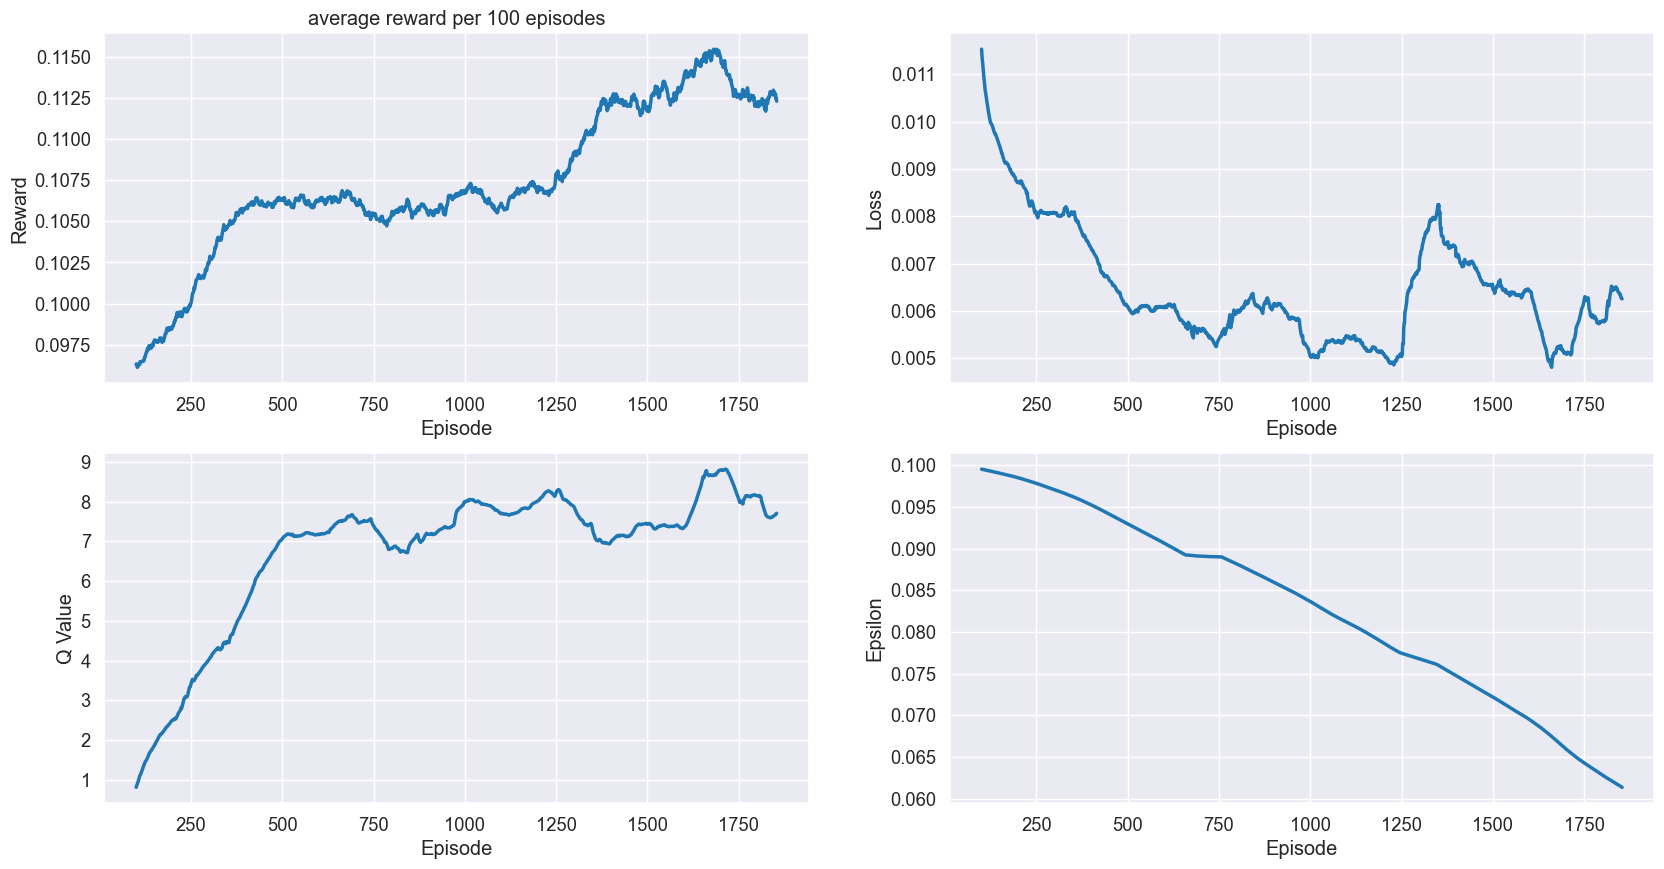

In [32]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("average reward per 100 episodes")
sns.lineplot(x=df["episode"], y=df["moving_average_reward"],color=color_palette[0], linewidth=2.5)
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.subplot(2, 2, 2)
sns.lineplot(x=df["episode"], y=df["moving_average_loss"], color=color_palette[0], linewidth=2.5)
plt.xlabel("Episode")
plt.ylabel("Loss")

plt.subplot(2, 2, 3)
sns.lineplot(x=df["episode"], y=df["moving_average_q_value"], color=color_palette[0], linewidth=2.5)
plt.xlabel("Episode")
plt.ylabel("Q Value")

plt.subplot(2, 2, 4)
sns.lineplot(x=df["episode"], y=df["moving_average_epsilon"], color=color_palette[0], linewidth=2.5)
plt.xlabel("Episode")
plt.ylabel("Epsilon")

plt.show()


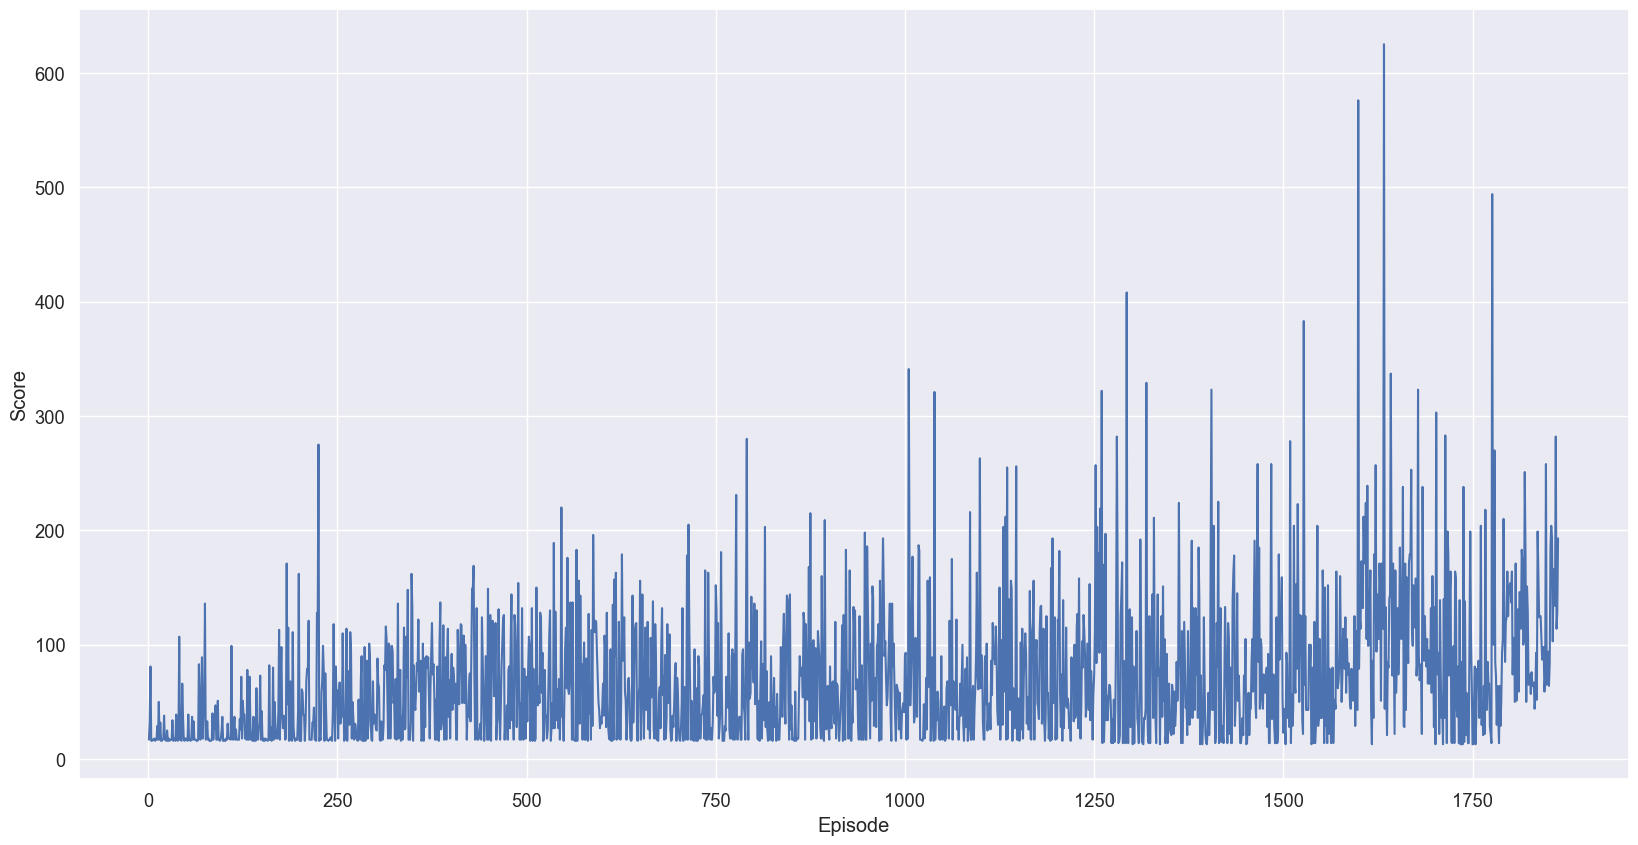

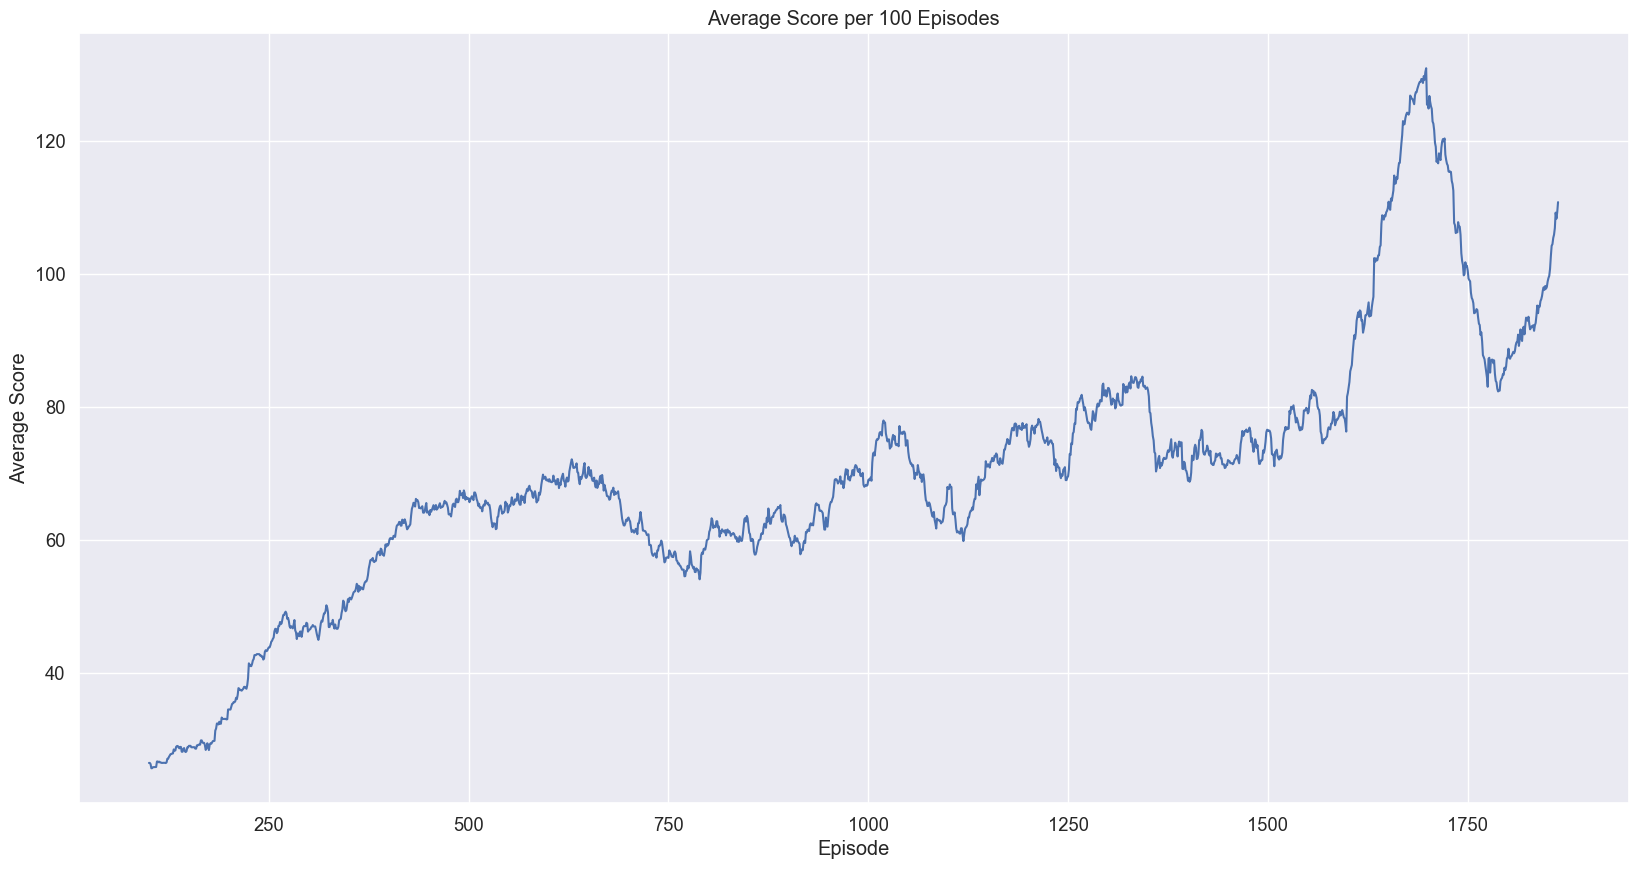

In [33]:
df = pd.read_csv("scores.csv", header=None)
df.columns = ["score"]
# add new column for episode
df["episode"] = df.index + 1
plt.figure(figsize=(20, 10))
plt.plot(df["episode"], df["score"])
plt.xlabel("Episode")
plt.ylabel("Score")


# calculate the average score per 100 episodes and draw a graph
def calculate_average_score_per_100_episodes():
    df = pd.read_csv("scores.csv", header=None)
    df.columns = ["score"]
    df["episode"] = df.index + 1
    df["average_score"] = df["score"].rolling(100).mean()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

df = calculate_average_score_per_100_episodes()
plt.figure(figsize=(20, 10))
plt.title("Average Score per 100 Episodes")
plt.plot(df["episode"], df["average_score"])
plt.xlabel("Episode")
plt.ylabel("Average Score")
plt.show()


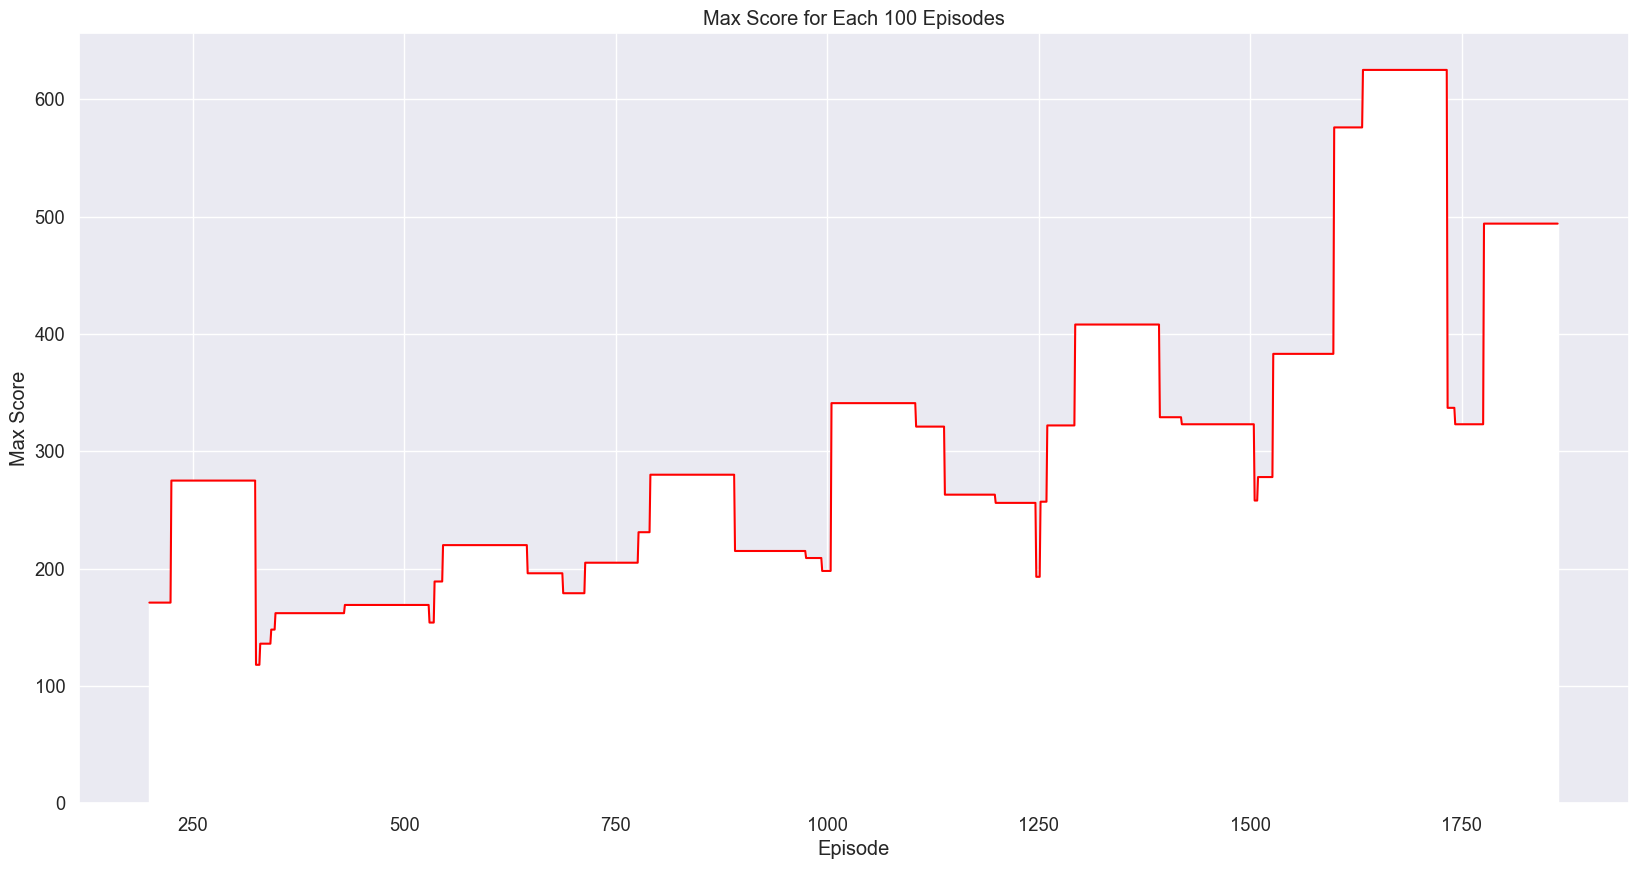

In [40]:
# show max score for each 100 episodes
def show_max_score_for_each_100_episodes():
    df = calculate_average_score_per_100_episodes()
    df["max_score"] = df["score"].rolling(100).max()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

df = show_max_score_for_each_100_episodes()
# show the results in combination bar and line chart use seaborn
plt.figure(figsize=(20, 10))
plt.title("Max Score for Each 100 Episodes")
plt.bar(df["episode"], df["max_score"], width=1, color="green")
plt.plot(df["episode"], df["max_score"], color="red")
plt.xlabel("Episode")
plt.ylabel("Max Score")
plt.show()

